In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd

In [2]:
def gauss(x,Amp,mu,sig,b): 
    return Amp* np.exp(-(x-mu)**2/2/sig**2) + b

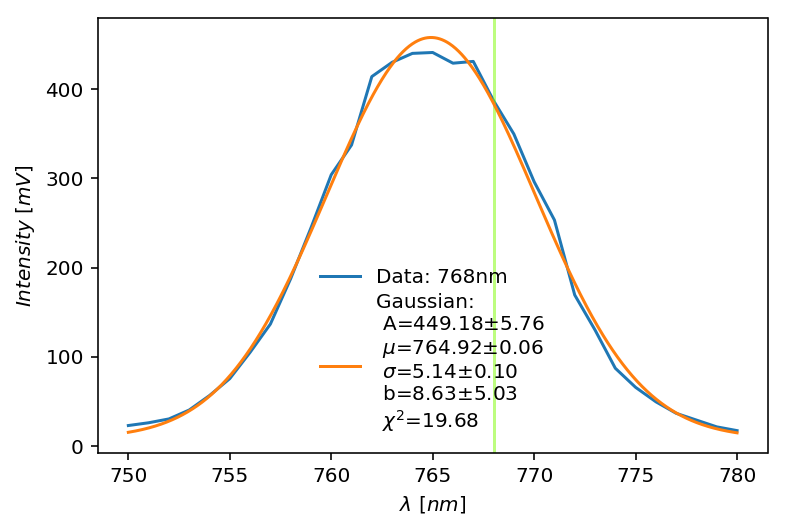

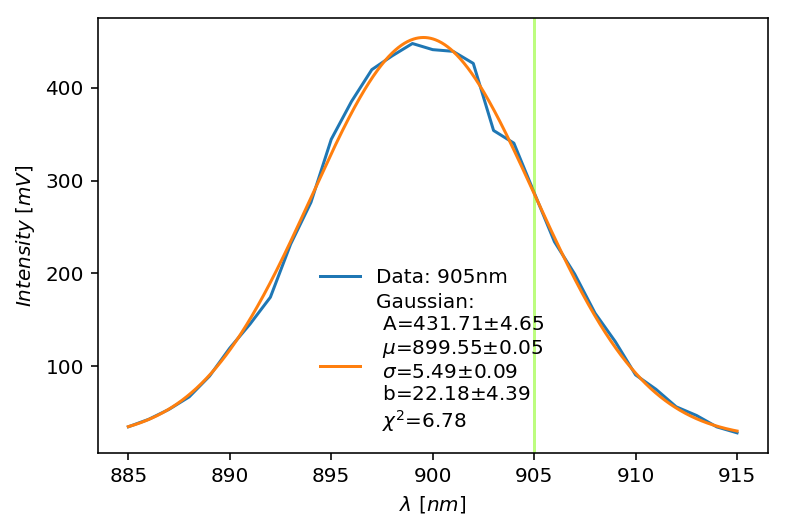

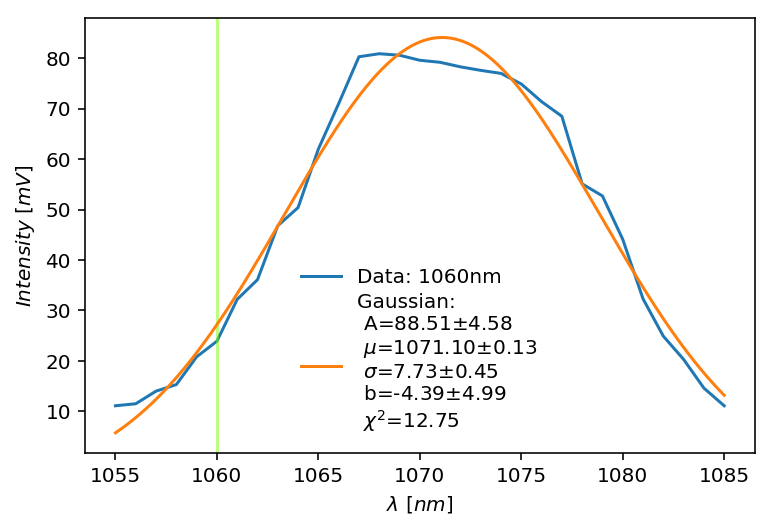

In [3]:
def plotFilter(name, guess):
    data=[]
    data.append( pd.read_csv("Data/{}.txt".format(name),delimiter="\t",skiprows=1 ))

    wavelen, intens =[],[]
    for entry in data:
        wavelen= entry.values[:,0]
        intens = entry.values[:,1]

    popt,pcov=cf(gauss, wavelen,intens,p0=guess)
    perr=np.sqrt(np.diag(pcov))

    chi2= sum([ (intens[i]-gauss(wavelen[i],*popt))**2 / gauss(wavelen[i],*popt) for i in range(len(intens))])

    xdata=np.linspace(wavelen[0],wavelen[-1],1000)
    fig,ax=plt.subplots(dpi=144)
    ax.plot(wavelen,intens, label="Data: {}".format(name))
    ax.axvline(int(name[:-2]), color="lawngreen",alpha=.5)
    ax.plot(xdata,gauss(xdata,*popt), 
            label="Gaussian: \n A={o[0]:.2f}$\pm${e[0]:.2f} \n $\mu$={o[1]:.2f}$\pm${e[1]:.2f} \n $\sigma$={o[2]:.2f}$\pm${e[2]:.2f} \n b={o[3]:.2f}$\pm${e[3]:.2f} \n $\chi^2$={c:.2f}".format(o=popt,e=perr,c=chi2))
    ax.set(xlabel="$\lambda \ [nm]$", ylabel="$Intensity \ [mV]$")
    ax.legend(frameon=False);
    fig.savefig("Plots/{}-Filter.png".format(name))
    
filters = ["768nm","905nm","1060nm"]
p0=[[400,756,5,20],[400,900,5,20],[80,1070,5,10]]
for i in range(len(filters)):
    plotFilter(filters[i],p0[i])